## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.129734 -0.097788 -0.576894  0.864367  0.233087 -0.192938
1  1.444996 -1.263287 -0.081500  0.784119  0.940273  0.129247
2  0.573665 -1.198104 -0.074908  0.013917  1.467197 -0.255395
3  0.771102  0.867325  0.563974  0.002438  1.361403  1.115256
4 -1.072672 -0.237564  0.158375  0.738604  1.237807 -0.116087


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0388553	total: 67.6ms	remaining: 1m 7s
1:	learn: 1.0282192	total: 68.2ms	remaining: 34s
2:	learn: 1.0157159	total: 68.8ms	remaining: 22.9s
3:	learn: 1.0041963	total: 69.4ms	remaining: 17.3s
4:	learn: 0.9950043	total: 70ms	remaining: 13.9s
5:	learn: 0.9859659	total: 70.6ms	remaining: 11.7s
6:	learn: 0.9744164	total: 71.2ms	remaining: 10.1s
7:	learn: 0.9628011	total: 71.7ms	remaining: 8.89s
8:	learn: 0.9523357	total: 72.3ms	remaining: 7.96s
9:	learn: 0.9433676	total: 72.9ms	remaining: 7.21s
10:	learn: 0.9312805	total: 73.5ms	remaining: 6.6s
11:	learn: 0.9205290	total: 74ms	remaining: 6.09s
12:	learn: 0.9112153	total: 74.6ms	remaining: 5.66s
13:	learn: 0.9023292	total: 75ms	remaining: 5.28s
14:	learn: 0.8938197	total: 75.5ms	remaining: 4.95s
15:	learn: 0.8849627	total: 76ms	remaining: 4.67s
16:	learn: 0.8762142	total: 76.4ms	remaining: 4.42s
17:	learn: 0.8671698	total: 76.8ms	remaining: 4.19s
18:	learn: 0.8571190	total: 77.3ms	remaining: 3.99s
19:

93:	learn: 0.4223927	total: 110ms	remaining: 1.05s
94:	learn: 0.4193164	total: 110ms	remaining: 1.05s
95:	learn: 0.4161040	total: 111ms	remaining: 1.04s
96:	learn: 0.4128620	total: 111ms	remaining: 1.03s
97:	learn: 0.4099234	total: 112ms	remaining: 1.03s
98:	learn: 0.4064201	total: 112ms	remaining: 1.02s
99:	learn: 0.4031201	total: 113ms	remaining: 1.01s
100:	learn: 0.3985840	total: 113ms	remaining: 1.01s
101:	learn: 0.3951806	total: 114ms	remaining: 1s
102:	learn: 0.3916474	total: 114ms	remaining: 994ms
103:	learn: 0.3880842	total: 115ms	remaining: 988ms
104:	learn: 0.3846554	total: 115ms	remaining: 981ms
105:	learn: 0.3816288	total: 116ms	remaining: 976ms
106:	learn: 0.3778460	total: 116ms	remaining: 969ms
107:	learn: 0.3751451	total: 117ms	remaining: 963ms
108:	learn: 0.3722751	total: 117ms	remaining: 957ms
109:	learn: 0.3689722	total: 117ms	remaining: 950ms
110:	learn: 0.3656003	total: 118ms	remaining: 945ms
111:	learn: 0.3625322	total: 119ms	remaining: 940ms
112:	learn: 0.3595296	

263:	learn: 0.1206607	total: 187ms	remaining: 523ms
264:	learn: 0.1198392	total: 188ms	remaining: 521ms
265:	learn: 0.1190615	total: 188ms	remaining: 520ms
266:	learn: 0.1182861	total: 189ms	remaining: 518ms
267:	learn: 0.1175266	total: 189ms	remaining: 516ms
268:	learn: 0.1167292	total: 189ms	remaining: 515ms
269:	learn: 0.1158776	total: 190ms	remaining: 513ms
270:	learn: 0.1152099	total: 190ms	remaining: 512ms
271:	learn: 0.1143567	total: 191ms	remaining: 511ms
272:	learn: 0.1137342	total: 191ms	remaining: 510ms
273:	learn: 0.1131351	total: 192ms	remaining: 508ms
274:	learn: 0.1124445	total: 192ms	remaining: 507ms
275:	learn: 0.1116525	total: 193ms	remaining: 506ms
276:	learn: 0.1109554	total: 193ms	remaining: 505ms
277:	learn: 0.1102597	total: 194ms	remaining: 503ms
278:	learn: 0.1094942	total: 194ms	remaining: 502ms
279:	learn: 0.1088707	total: 195ms	remaining: 501ms
280:	learn: 0.1082239	total: 195ms	remaining: 500ms
281:	learn: 0.1075564	total: 196ms	remaining: 498ms
282:	learn: 

486:	learn: 0.0443263	total: 293ms	remaining: 309ms
487:	learn: 0.0442599	total: 293ms	remaining: 308ms
488:	learn: 0.0441943	total: 294ms	remaining: 307ms
489:	learn: 0.0439152	total: 294ms	remaining: 306ms
490:	learn: 0.0438510	total: 295ms	remaining: 305ms
491:	learn: 0.0435455	total: 295ms	remaining: 305ms
492:	learn: 0.0434824	total: 296ms	remaining: 304ms
493:	learn: 0.0432121	total: 296ms	remaining: 303ms
494:	learn: 0.0431503	total: 297ms	remaining: 303ms
495:	learn: 0.0428554	total: 297ms	remaining: 302ms
496:	learn: 0.0427947	total: 297ms	remaining: 301ms
497:	learn: 0.0426066	total: 298ms	remaining: 300ms
498:	learn: 0.0424296	total: 298ms	remaining: 300ms
499:	learn: 0.0422466	total: 299ms	remaining: 299ms
500:	learn: 0.0420730	total: 299ms	remaining: 298ms
501:	learn: 0.0418171	total: 300ms	remaining: 297ms
502:	learn: 0.0416479	total: 300ms	remaining: 297ms
503:	learn: 0.0414272	total: 301ms	remaining: 296ms
504:	learn: 0.0412619	total: 301ms	remaining: 295ms
505:	learn: 

651:	learn: 0.0254110	total: 371ms	remaining: 198ms
652:	learn: 0.0253210	total: 371ms	remaining: 197ms
653:	learn: 0.0252332	total: 372ms	remaining: 197ms
654:	learn: 0.0251434	total: 372ms	remaining: 196ms
655:	learn: 0.0250687	total: 372ms	remaining: 195ms
656:	learn: 0.0249839	total: 373ms	remaining: 195ms
657:	learn: 0.0248714	total: 374ms	remaining: 194ms
658:	learn: 0.0247646	total: 374ms	remaining: 194ms
659:	learn: 0.0246787	total: 375ms	remaining: 193ms
660:	learn: 0.0245965	total: 375ms	remaining: 192ms
661:	learn: 0.0244898	total: 376ms	remaining: 192ms
662:	learn: 0.0244500	total: 376ms	remaining: 191ms
663:	learn: 0.0243491	total: 376ms	remaining: 190ms
664:	learn: 0.0242894	total: 377ms	remaining: 190ms
665:	learn: 0.0242300	total: 378ms	remaining: 189ms
666:	learn: 0.0241469	total: 378ms	remaining: 189ms
667:	learn: 0.0241077	total: 379ms	remaining: 188ms
668:	learn: 0.0240381	total: 379ms	remaining: 188ms
669:	learn: 0.0239797	total: 380ms	remaining: 187ms
670:	learn: 

871:	learn: 0.0129396	total: 477ms	remaining: 70ms
872:	learn: 0.0128894	total: 478ms	remaining: 69.5ms
873:	learn: 0.0128662	total: 478ms	remaining: 68.9ms
874:	learn: 0.0128093	total: 478ms	remaining: 68.3ms
875:	learn: 0.0127771	total: 479ms	remaining: 67.8ms
876:	learn: 0.0127444	total: 479ms	remaining: 67.2ms
877:	learn: 0.0127214	total: 479ms	remaining: 66.6ms
878:	learn: 0.0126755	total: 480ms	remaining: 66.1ms
879:	learn: 0.0126434	total: 481ms	remaining: 65.5ms
880:	learn: 0.0125935	total: 481ms	remaining: 65ms
881:	learn: 0.0125489	total: 481ms	remaining: 64.4ms
882:	learn: 0.0125176	total: 482ms	remaining: 63.8ms
883:	learn: 0.0124909	total: 482ms	remaining: 63.3ms
884:	learn: 0.0124439	total: 483ms	remaining: 62.7ms
885:	learn: 0.0124176	total: 483ms	remaining: 62.2ms
886:	learn: 0.0123782	total: 484ms	remaining: 61.6ms
887:	learn: 0.0123557	total: 484ms	remaining: 61.1ms
888:	learn: 0.0123097	total: 485ms	remaining: 60.5ms
889:	learn: 0.0122721	total: 485ms	remaining: 60ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

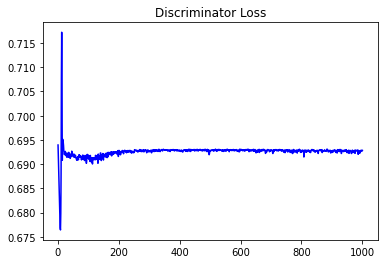

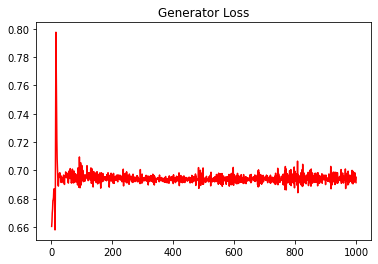

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09748973273411633


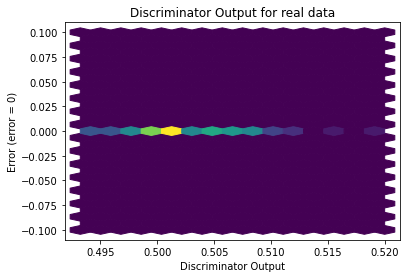

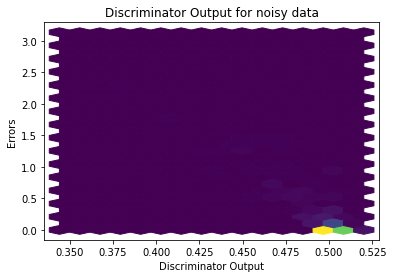

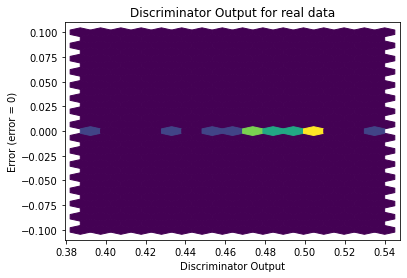

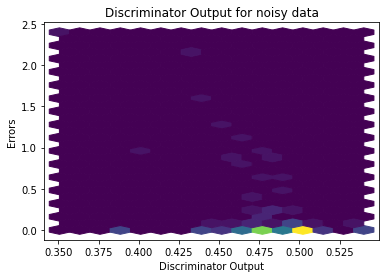

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


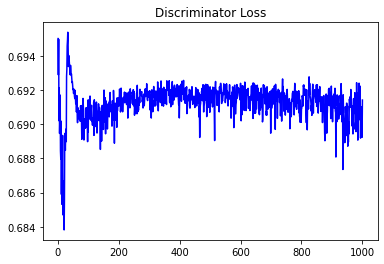

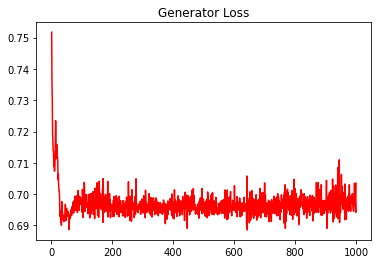

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05202631247244867


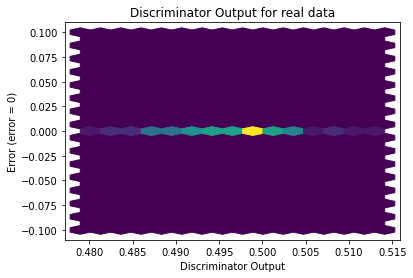

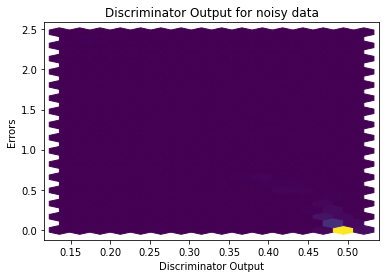

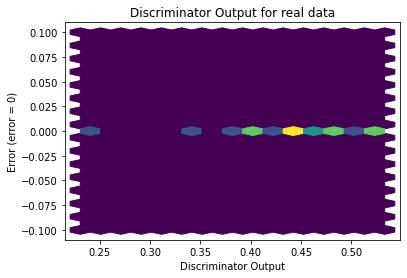

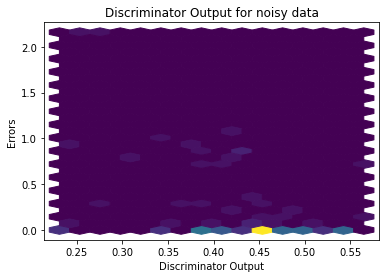

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1513]], requires_grad=True)
